## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe

In [2]:
pd.set_option('display.float_format', '{:.0f}'.format)
df1 = pd.read_csv('D:/Data Science Notes/Guvi/Assignment 5/takehome_users.csv', encoding = 'latin-1')
df2 = pd.read_csv('D:/Data Science Notes/Guvi/Assignment 5/takehome_user_engagement.csv', parse_dates = ['time_stamp'])

In [3]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240


In [4]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
len_df1 = df1[df1.columns[0]].count()
len_df1

12000

## Adopted User Column

In [6]:
df2['wk'] = df2['time_stamp'].dt.week
df2c = df2.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name='freq')

result = df2c[df2c.freq >= 3]

## only user ids matching criteria
adopted = result.user_id.tolist()
adopted = pd.DataFrame(adopted)
adopted_user = pd.DataFrame(adopted[adopted.columns[0]].unique())
adopted_user.columns = ['object_id']
len_adopted_user = adopted_user[adopted_user.columns[0]].count()
print(len_adopted_user)
adopted_user.head()

1445


,object_id
0,10
1,42
2,63
3,69
4,81


In [7]:
ucs = df1['creation_source'].unique()
ucs

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

### Adopted Percentage of each value of creation source (ucsPer)

In [8]:
ucsPer = []
ucsPerdict = {}
for uniq in ucs:
    ### Account Created for:
    ids = df1[['object_id', 'name', 'creation_source']][df1['creation_source'] == uniq]
    ids_len = ids[ids.columns[0]].count()

    ### Common of adopted user and each creation_source value
    com_df1 = pd.merge(adopted_user, ids, on = 'object_id', how = 'inner' )

    ### count of each creation_source adopted to this social media
    com_df1_len = com_df1[com_df1.columns[0]].count()

    ### Percentage of each creation_source value adopted into the product
    per_adop = (com_df1_len/ids_len)*100
    ucsPer.append(per_adop)
    ucsPerdict[uniq] = per_adop
print(ucsPer)
print(ucsPerdict)

[15.071659731853906, 11.5420780441937, 13.17680881648299, 6.963524396020842, 14.873646209386282]
{'GUEST_INVITE': 15.071659731853906, 'ORG_INVITE': 11.5420780441937, 'SIGNUP': 13.17680881648299, 'PERSONAL_PROJECTS': 6.963524396020842, 'SIGNUP_GOOGLE_AUTH': 14.873646209386282}


### Each creation source users who are opted_in_to_mailing_list (ucsPerml)

In [9]:
ucsPerml = []
for uniq in ucs:
    ids_oml = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                       & (df1['opted_in_to_mailing_list'] == 1)]
    ids_len_oml = ids_oml[ids_oml.columns[0]].count()


    com_df1_oml = pd.merge(adopted_user, ids_oml, on = 'object_id', how = 'inner' )
    com_df1_len_oml = com_df1_oml[com_df1_oml.columns[0]].count()

    ### Percentage of Each creation source users who opted_in_to_mailing_list are adopted to product
    per_adop_oml = (com_df1_len_oml/ids_len_oml)*100
    ucsPerml.append(per_adop_oml)
print(ucsPerml)

[16.45101663585952, 12.244897959183673, 14.476190476190476, 6.640625, 13.905325443786982]


### Each creation source users who are enabled_for_marketing_drip (ucsPermd)

In [10]:
ucsPermd = []
for uniq in ucs:
    ids_emd = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                       & (df1['enabled_for_marketing_drip'] == 1)]
    ids_len_emd = ids_emd[ids_emd.columns[0]].count()


    com_df1_emd = pd.merge(adopted_user, ids_emd, on = 'object_id', how = 'inner' )
    com_df1_len_emd = com_df1_emd[com_df1_emd.columns[0]].count()

    ### Percentage of Each creation source users who enabled_for_marketing_drip are adopted to product
    per_adop_emd = (com_df1_len_emd/ids_len_emd)*100
    ucsPermd.append(per_adop_emd)
print(ucsPermd)

[13.793103448275861, 11.956521739130435, 14.733542319749215, 7.2607260726072615, 16.425120772946862]


### Each creation source users who are  opted_in_to_mailing_list  and enabled_for_marketing_drip (ucsPermlmd)

In [11]:
ucsPermlmd = []
for uniq in ucs:
    ids_mlmd = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                                & (df1['opted_in_to_mailing_list'] == 1)
                                                                & (df1['enabled_for_marketing_drip'] == 1)]
    ids_len_mlmd = ids_mlmd[ids_mlmd.columns[0]].count()


    com_df1_mlmd = pd.merge(adopted_user, ids_mlmd, on = 'object_id', how = 'inner' )
    com_df1_len_mlmd = com_df1_mlmd[com_df1_mlmd.columns[0]].count()

    ### Percentage of each creation source users who enabled_for_marketing_drip are adopted to product
    per_adop_mlmd = (com_df1_len_mlmd/ids_len_mlmd)*100
    ucsPermlmd.append(per_adop_mlmd)
print(ucsPermlmd)

[15.18987341772152, 12.448979591836734, 15.0, 6.912442396313365, 14.556962025316455]


### Each creation source users who are not opted_in_to_mailing_list (ucsPer_nml)

In [12]:
ucsPer_nml = []
for uniq in ucs:
    ids_noml = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                           & (df1['opted_in_to_mailing_list'] == 0)]
    ids_len_noml = ids_noml[ids_noml.columns[0]].count()

    
    com_df1_noml = pd.merge(adopted_user, ids_noml, on = 'object_id', how = 'inner' )
    com_df1_len_noml = com_df1_noml[com_df1_noml.columns[0]].count()

    ### Percentage of each creation source users who opted_in_to_mailing_list are adopted to product
    per_adop_noml = (com_df1_len_noml/ids_len_noml)*100
    ucsPer_nml.append(per_adop_noml)
print(ucsPer_nml)

[14.61159062885327, 11.303526448362721, 12.740076824583868, 7.066916823014384, 15.18624641833811]


### Each creation source users who are not enabled_for_marketing_drip (ucsPer_nmd)

In [13]:
ucsPer_nmd = []
for uniq in ucs:
    ids_nemd = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                           & (df1['enabled_for_marketing_drip'] == 0)]
    ids_len_nemd = ids_nemd[ids_nemd.columns[0]].count()
    
    com_df1_nemd = pd.merge(adopted_user, ids_nemd, on = 'object_id', how = 'inner' )
    com_df1_len_nemd = com_df1_nemd[com_df1_nemd.columns[0]].count()

    ### Percentage of each creation source users who enabled_for_marketing_drip are adopted to product
    per_adop_nemd = (com_df1_len_nemd/ids_len_nemd)*100
    ucsPer_nmd.append(per_adop_nemd)
print(ucsPer_nmd)

[15.292841648590022, 11.46814404432133, 12.895927601809957, 6.913716814159292, 14.60101867572156]


### Each creation source users who are not opted_in_to_mailing_list and enabled_for_marketing_drip (ucsPer_nmlmd)

In [14]:
ucsPer_nmlmd = []
for uniq in ucs:
    ids_nmlmd = df1[['object_id', 'name', 'creation_source']][(df1['creation_source'] == uniq)
                                                                & (df1['opted_in_to_mailing_list'] == 0)
                                                                & (df1['enabled_for_marketing_drip'] == 0)]
    ids_len_nmlmd = ids_nmlmd[ids_nmlmd.columns[0]].count()


    com_df1_nmlmd = pd.merge(adopted_user, ids_nmlmd, on = 'object_id', how = 'inner' )
    com_df1_len_nmlmd = com_df1_nmlmd[com_df1_nmlmd.columns[0]].count()

    ### Percentage of each creation source users who enabled_for_marketing_drip are adopted to product
    per_adop_nmlmd = (com_df1_len_nmlmd/ids_len_nmlmd)*100
    ucsPer_nmlmd.append(per_adop_nmlmd)
print(ucsPer_nmlmd)

[14.870129870129869, 11.350099272005295, 12.6770060687795, 7.005948446794448, 14.829659318637276]


### Visualisation (Bar Chart)

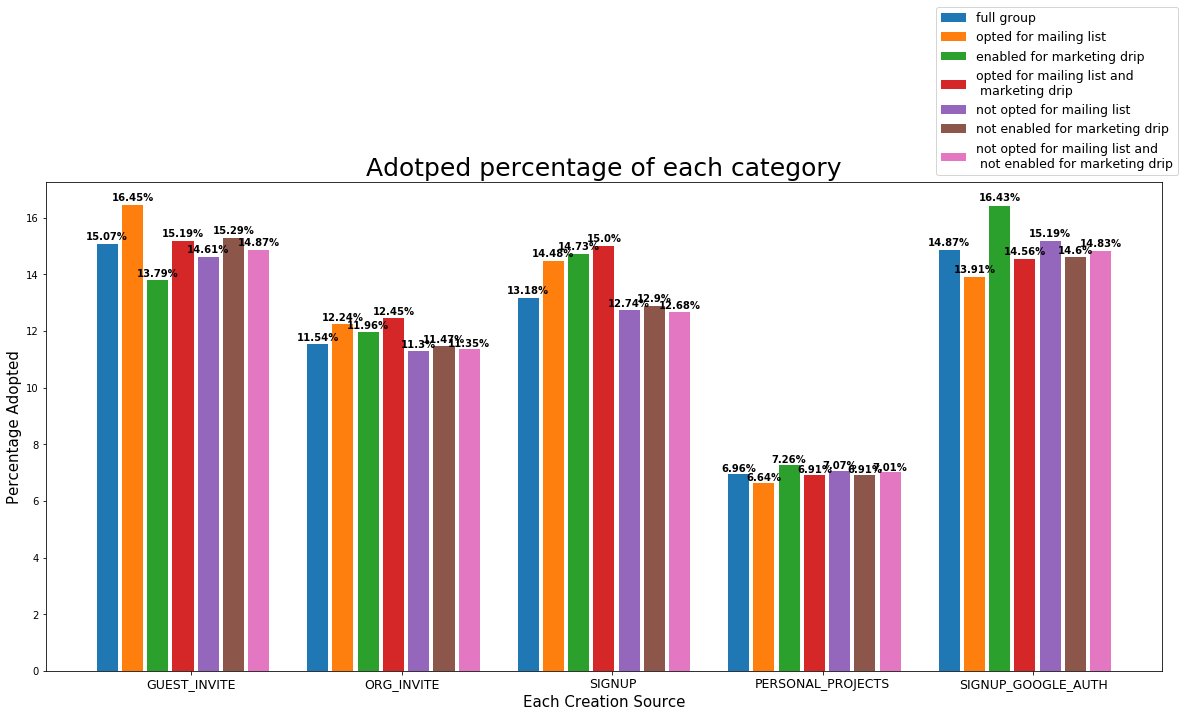

In [15]:
# Plot size
plt.figure(figsize=(20, 9))

# Plotting bars
x_axis = np.arange(len(ucsPer))
width = 0.10
p1 = plt.bar(x_axis, ucsPer, width)
p2 = plt.bar(x_axis+0.12, ucsPerml, width)
p3 = plt.bar(x_axis+0.24, ucsPermd, width)
p4 = plt.bar(x_axis +0.36, ucsPermlmd, width)
p5 = plt.bar(x_axis +0.48, ucsPer_nml, width)
p6 = plt.bar(x_axis +0.6, ucsPer_nmd, width)
p7 = plt.bar(x_axis+0.72, ucsPer_nmlmd, width)

# Annotation
ecp = [ucsPer, ucsPerml, ucsPermd, ucsPermlmd, ucsPer_nml, ucsPer_nmd, ucsPer_nmlmd]
for index, graph in enumerate([p1, p2, p3, p4, p5, p6, p7]) :
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
             y+height*1.01,
             str(round(ecp[index][i], 2))+'%',
             ha='center', weight='bold', fontsize = 10)
        i += 1

# Legend
plt.legend(['full group', 'opted for mailing list', 'enabled for marketing drip',
           'opted for mailing list and\n marketing drip', 'not opted for mailing list',
           'not enabled for marketing drip', 'not opted for mailing list and\n not enabled for marketing drip'],
          bbox_to_anchor=(1.02, 1) , loc = 'lower right', fontsize = 12.5)

# graph details
plt.xticks([i + 0.40 for i in range(5)], ucs, fontsize = 12.5)
plt.xlabel("Each Creation Source", fontsize = 15)
plt.ylabel("Percentage Adopted", fontsize = 15)
plt.title("Adotped percentage of each category", fontsize = 25)

# graph download
plt.savefig('Adopted_Percentage_each_creation_source.png')

plt.show()